### Project - Thera Bank Personal Loan Campaign

#### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.

#### Domain:
Banking

#### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

##### Attribute Information:
ID: Customer ID
Age: Customer's age in completed years
Experience: #years of professional experience
Income: Annual income of the customer ($000)
ZIP Code: Home Address ZIP code.
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month ($000)
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any. ($000)
Personal Loan: Did this customer accept the personal loan offered in the last campaign?
Securities Account: Doesthe customer have a securities account with the bank?
CD Account: Doesthe customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
Credit card: Doesthe customer use a credit card issued by the bank?

#### Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classificationmodel
Model evaluation

#### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

#### 1. Import the necessary packages

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset into dataframes

In [3]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

#### Apply info, shape, describe, and find the number of missing values in the data 

In [4]:
# Check to see the number of records in the dataset
bank_df.shape

(5000, 14)

In [5]:
print(bank_df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation: All the columns of the dataset have the same number of non-null values.

In [7]:
# Check to see if data has any missing values
bank_df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

#### Observation: No Null Values are present 

In [8]:
bank_df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [9]:
bank_df.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

#### Observations from Descriptive Statistics

For the columns 'Age', and 'Experience' the mean is almost similar to median and so we can say that both 'Age' and 'Experience' are normally distributed. 

For the other three columns 'Income', 'CCAvg' and 'Mortgage' the mean is greater than median, so we can say that they are right(positively) skewed.

In [10]:
(bank_df < 0).any()

ID                    False
Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

#### Observation: Dataframe column "Experience" contains negative values. 

In [11]:
# Check the unique values in each column of the dataframe
bank_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
# Check the number of people with zero mortgage
zero_mgage_ct = len(bank_df['Mortgage']) - np.count_nonzero(bank_df['Mortgage'])
print("Number of people with zero mortgage: " +str(zero_mgage_ct))

Number of people with zero mortgage: 3462


In [13]:
# Check the number of people with zero credit card spending per month
zero_ccspend_ct = len(bank_df['CCAvg']) - np.count_nonzero(bank_df['CCAvg'])
print("Number of people with zero credit card spending per month: " +str(zero_ccspend_ct))

Number of people with zero credit card spending per month: 106


In [14]:
import pandas_profiling
bank_df.profile_report()

#### Observations from Pandas Profiling Report

 From the profiling report generated above, we can see that the dataset has:
 
 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
 
 2 categorical variables: ‘Education’, ‘Family’ and 
 
 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’. 
 
 'Age' and 'Experience' are highly correlated and CCAvg and Income are moderately correlated with each other.

### Categorical columns
Family: Family size of the customer
Education: Education Level. 
1: Undergrad; 2: Graduate; 3: Advanced/Professional

In [15]:
# Value counts of all categorical columns
print('Categorical Column - Family')
print(bank_df['Family'].value_counts())
print('Categorical Column - Education')
print(bank_df['Education'].value_counts())

Categorical Column - Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Categorical Column - Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64


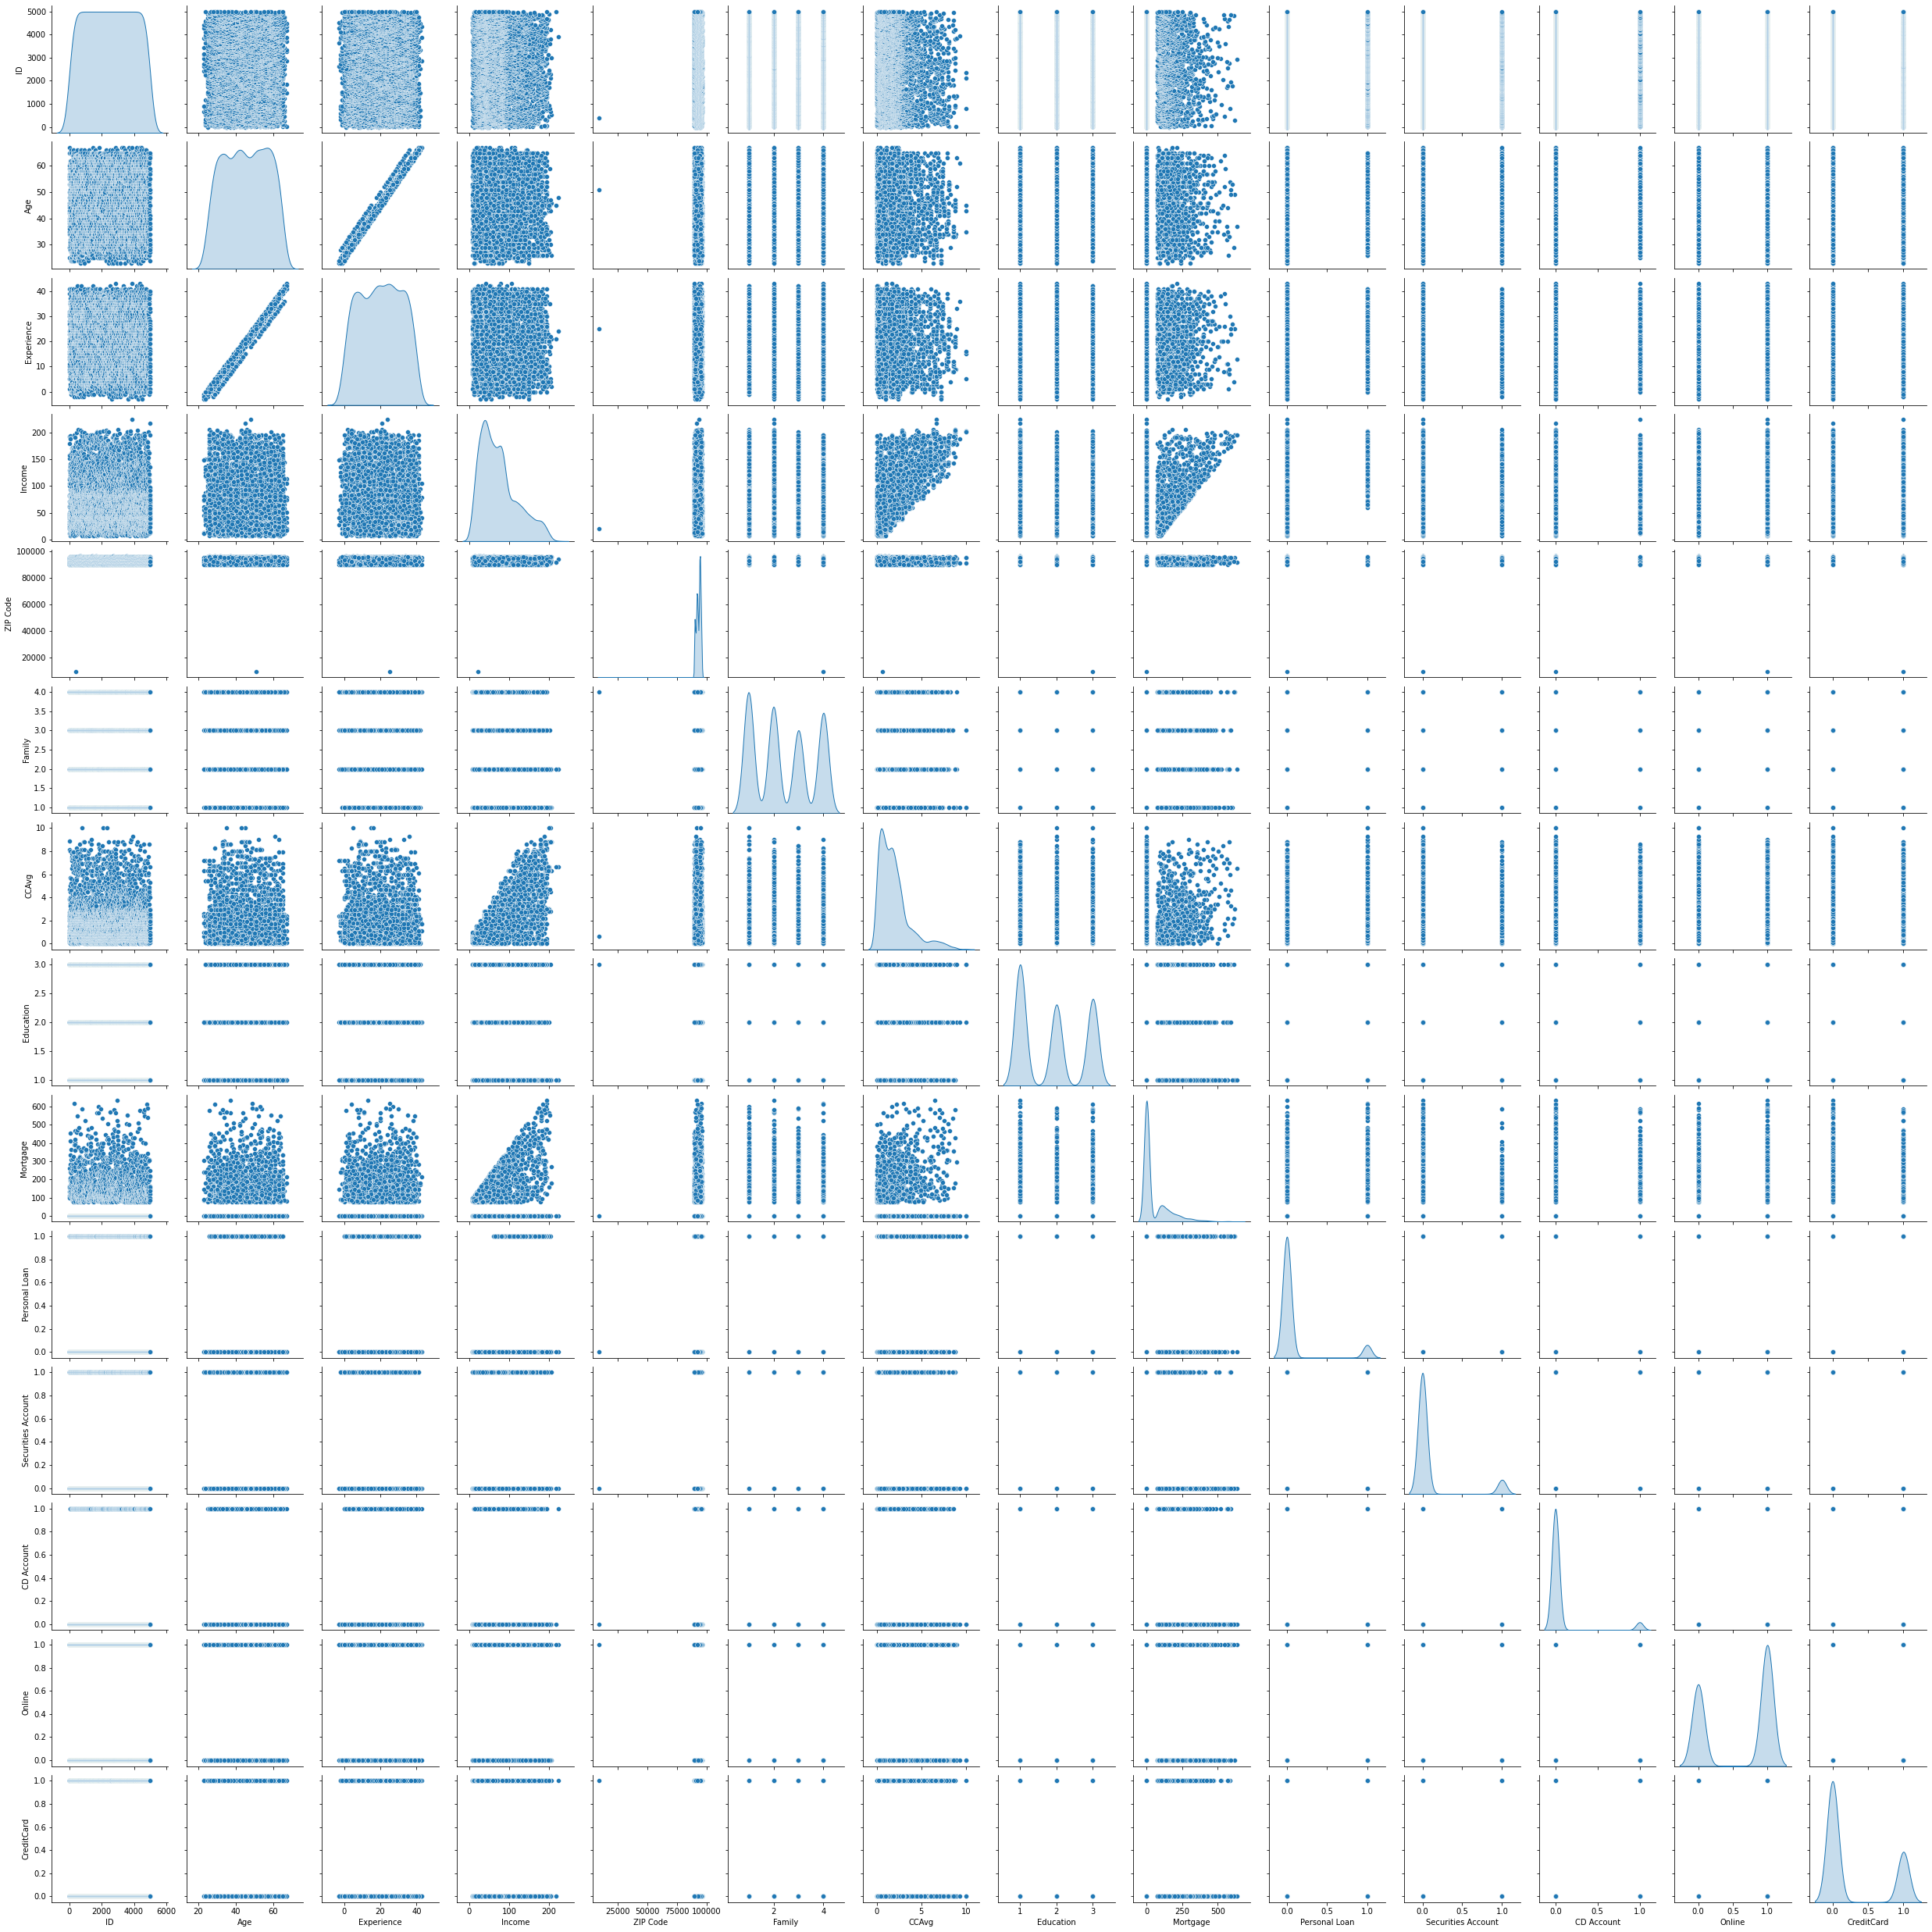

In [16]:
sns.pairplot(data = bank_df,diag_kind ='kde');

### Distribution of Target variable

In [17]:
bank_df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### Observation:  Target variable is imbalanced

## Bivariate Analysis

#### Categorical Independent Variables vs Target Variable

Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


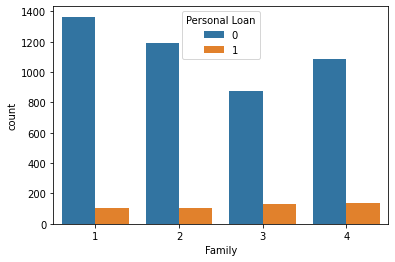

In [18]:
print(pd.crosstab(bank_df['Family'],bank_df['Personal Loan'],normalize='index'))
sns.countplot(x="Family", data=bank_df,hue="Personal Loan");

Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


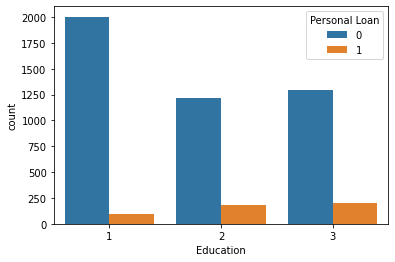

In [19]:
print(pd.crosstab(bank_df['Education'],bank_df['Personal Loan'],normalize='index'))
sns.countplot(x="Education", data=bank_df,hue="Personal Loan");

#### Observation: 

From the above analysis, it can be inferred that family size/number of family members does not seem to significantly affect the probability of taking personal loan. 

However customers who are more educated seems to have a higher probability of taking personal loans.

#### Boolean Independent Variables vs Target Variable

In [20]:
pd.crosstab(bank_df['Securities Account'],bank_df['Personal Loan'],normalize='index')

Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943

In [21]:
pd.crosstab(bank_df['Online'],bank_df['Personal Loan'],normalize='index')

Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752

In [22]:
 pd.crosstab(bank_df['CreditCard'],bank_df['Personal Loan'],normalize='index')

Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279

In [23]:
pd.crosstab(bank_df['CD Account'],bank_df['Personal Loan'],normalize='index')

Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576

#### Observation: 

From the above analysis, it can be inferred that the probability of taking a personal loan from the bank does not seem to be affected by whether the customers have or do not have a Securities Account with the bank,use or do not use a credit card or the Online option while banking. 

However the customers with a CD account with the bank seem to take more personal loans from the bank.

#### Numerical Independent Variables vs Target Variable

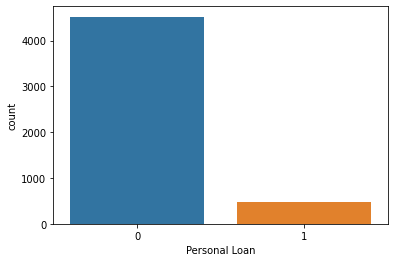

In [24]:
sns.countplot(bank_df["Personal Loan"]);

In [25]:
bank_df.groupby(bank_df['Personal Loan']).mean()

ID        Age  Experience      Income      ZIP Code  \
Personal Loan                                                                 
0              2512.165487  45.367257   20.132301   66.237389  93152.428761   
1              2390.650000  45.066667   19.843750  144.745833  93153.202083   

                 Family     CCAvg  Education    Mortgage  Securities Account  \
Personal Loan                                                                  
0              2.373451  1.729009   1.843584   51.789381            0.102212   
1              2.612500  3.905354   2.233333  100.845833            0.125000   

               CD Account    Online  CreditCard  
Personal Loan                                    
0                0.035841  0.595796    0.293584  
1                0.291667  0.606250    0.297917

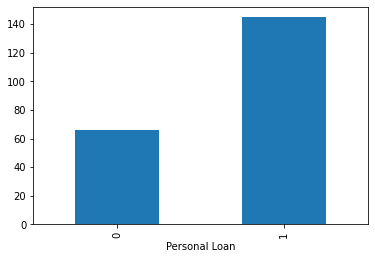

In [26]:
bank_df.groupby('Personal Loan')['Income'].mean().plot(kind="bar");

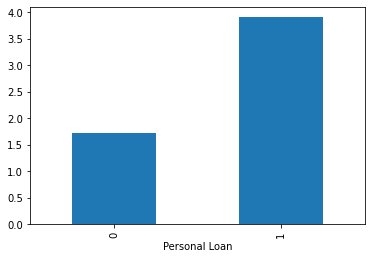

In [27]:
bank_df.groupby('Personal Loan')['CCAvg'].mean().plot(kind="bar");

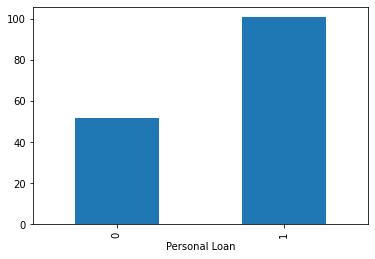

In [28]:
bank_df.groupby('Personal Loan')['Mortgage'].mean().plot(kind="bar");

#### Observation: 

Experience and Age are highly correlated and so one of those two columns can be dropped. 

Also the columns ‘ID’ and 'Zip Code' comprise of all or mostly unique values and are not continous. Each of these columns has too many categories that would not provide any info to the algorithm and hence can be dropped as well.

In [29]:
# Dropping the irrelevant columns
bank_df.drop('Experience',axis=1,inplace=True)
bank_df.drop('ID',axis=1,inplace=True)
bank_df.drop('ZIP Code',axis=1,inplace=True)

### Model building using Logistic Regression from Sklearn

In [30]:
## Define X and Y variables
X = bank_df.drop('Personal Loan', axis=1)
Y = bank_df[['Personal Loan']]

In [31]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X

Age  Income  Family  CCAvg  Education  Mortgage  Securities Account  \
0      25      49       4    1.6          1         0                   1   
1      45      34       3    1.5          1         0                   1   
2      39      11       1    1.0          1         0                   0   
3      35     100       1    2.7          2         0                   0   
4      35      45       4    1.0          2         0                   0   
...   ...     ...     ...    ...        ...       ...                 ...   
4995   29      40       1    1.9          3         0                   0   
4996   30      15       4    0.4          1        85                   0   
4997   63      24       2    0.3          3         0                   0   
4998   65      49       3    0.5          2         0                   0   
4999   28      83       3    0.8          1         0                   0   

      CD Account  Online  CreditCard  
0              0       0           0  
1              0       0           0  
2              0       0           0  
3              0       0           0  
4              0       0           1  
...          ...     ...         ...  
4995           0       1           0  
4996           0       1           0  
4997           0       0           0  
4998           0       1           0  
4999           0       1           1  

[5000 rows x 10 columns]

In [32]:
## Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [33]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_predict = logreg.predict(X_test)

In [35]:
y_predict2 = logreg.predict_proba(X_test)[:,1] 
#predict_proba(X_test)[:,1]# Predicting the target variable on test data

In [36]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

[[1347   15]
 [  55   83]]


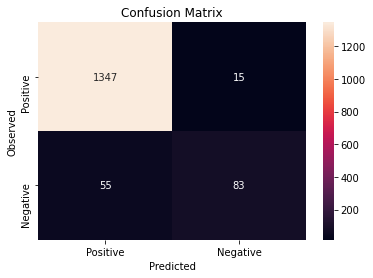

In [37]:
cmatrix = confusion_matrix(y_test, y_predict)
print(cmatrix)
class_label = ["Positive", "Negative"]
bankdf_cm = pd.DataFrame(cmatrix, index = class_label, columns = class_label)
sns.heatmap(bankdf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.show()

In [38]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1362
           1       0.85      0.60      0.70       138

    accuracy                           0.95      1500
   macro avg       0.90      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [39]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Training accuracy 0.9477142857142857

Testing accuracy 0.9533333333333334

Recall: 0.6014492753623188

Precision: 0.8469387755102041

F1 Score: 0.7033898305084745

Roc Auc Score: 0.795218029751644


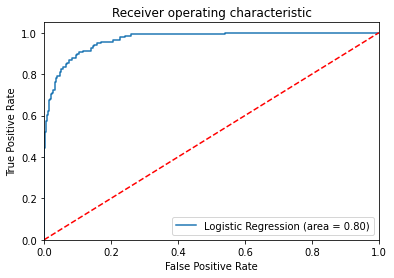

In [40]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Hyperparameter Tuning and Improving Model Performance for Logistic Regression

In [41]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Using GridSearchCV to tune the model's parameters

#### Create Hyperparameter Search Space

In [42]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'penalty': ['l1'], 'solver': [ 'liblinear','saga']},
  {'penalty': ['l2','none'], 'solver': ['newton-cg','lbfgs','sag','saga']},
  {'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]},
  {'class_weight': [None,'balanced']}
 ]

#### Create Grid Search

In [43]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, param_grid, cv=5, n_jobs = -1,verbose=2)

#### Conduct Grid Search

In [44]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    3.5s finished


#### View Hyperparameter Values Of Best Model

In [45]:
# View best hyperparameters
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Hyper Parameters are: ', best_model.best_params_)

Best C: 1.0
Best Hyper Parameters are:  {'penalty': 'l2', 'solver': 'newton-cg'}


#### Predict Using Best Model

In [46]:
# Predict target vector
best_model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
#Therefore final model is
y_predict = best_model.predict(X_test)
print("Training accuracy",best_model.score(X_train,y_train))  
print()
print("Testing accuracy",best_model.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Training accuracy 0.9514285714285714

Testing accuracy 0.954

Recall: 0.6231884057971014

Precision: 0.8349514563106796

F1 Score: 0.7136929460580913

Roc Auc Score: 0.8053533805784333


In [48]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[1345   17]
 [  52   86]]


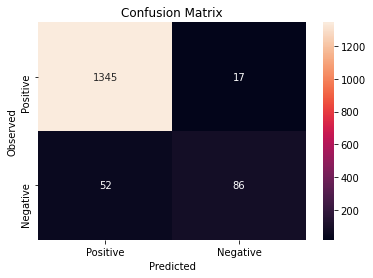

In [49]:
class_label = ["Positive", "Negative"]
bankdf_cm = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(bankdf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.show()

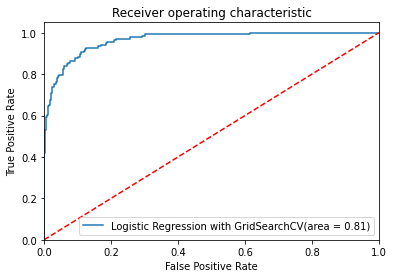

In [50]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with GridSearchCV(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

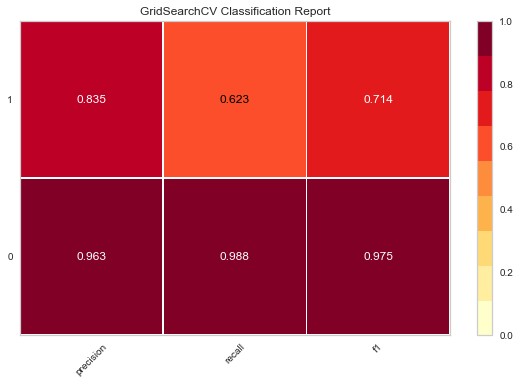

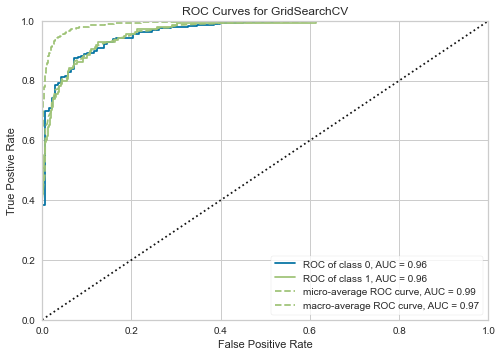

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [51]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library

viz = ClassificationReport(best_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(best_model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Business Insights

Confusion matrix is a metric that is often used to measure the performance of a classification algorithm (such as Logistic Regression used above) which contains information about the observed/actual and the predicted class. 

The predicted classes are represented in the columns of the matrix, whereas the actual/observed classes are in the rows of the matrix. For this context, we then have four cases that can be explained as follows:

True positives (TP): the cases for which the classifier predicted that the customer would take the personal loan  and the customer accepted the offered loan.
True negatives (TN): the cases for which the classifier predicted that the customer would not take the personal loan  and the customer did not accept the loan.
False positives (FP): the cases for which the classifier predicted that the customer would accept the personal loan but the customer did not.
False negatives (FN): the cases for which the classifier predicted that the customer would not accept the personal loan  but the customer accepted the offered loan.

Accuracy, Precision, Recall, F1-score are some of the metrics that can be calculated from confusion matrix and that aid us in measuring the model's performance and improve it by using some cost function.

Precision is usually used when the goal is to limit the number of false positives (FP) and Recall is usually used when the goal is to limit the number of false negatives (FN).F1-score is the harmonic mean of precision and recall.

In this context, the bank would like to minimize/limit False Negatives and so recall and f1-score which is the harmonic mean of both precision and recall would give us a better evaluation metric. 

AUC-ROC curve is one of the most important evaluation metrics for checking or visualizing the performance of the multi - class classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes (i.e., customers accepting the loan offered and customers not accepting the loan offered by the bank). 
The area under the ROC curve (usually denoted by AUC) is a good measure of the performance of the classification algorithm. If it is near 0.5, the classifier is not much better than random guessing, whereas it gets better as the area gets close to 1.

<strong>Logical Regression</strong>
<ul>
    <li>Recall(%)    - 60 </li>
    <li>F1-Score(%)  - 70 </li>            
    <li>ROC-AUC(%)   - 79.5</li> 
    <li>Accuracy(%)  - 95.3</li>
</ul>

<strong>Logical Regression with GridSearchCV</strong>
<ul>
    <li>Recall(%)    - 62 </li>
    <li>F1-Score(%)  - 71 </li>           
    <li>ROC-AUC(%)   - 80.5</li> 
    <li>Accuracy(%)  - 95.4</li>
</ul>